Setup and train a deep neural networks on common benchmark image dataset
-----

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

<br>
<center><img src="https://paperswithcode.com/media/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width="75%"/></center>

Learn more the dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html) and [here](https://www.kaggle.com/c/cifar-10)     

----
Setup CIFAR data
----



In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [2]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Tests are a great idea to confirm assumptions
# There are 50K images in training and 10K in test
# Each image is 32x32 pixels with 3 channels for RGB values.
assert x_train.shape == (50_000, 32, 32, 3)
assert x_test.shape  == (10_000, 32, 32, 3)
assert y_train.shape == (50_000, 1)
assert y_test.shape  == (10_000, 1)

__Exercise__: Convert class vectors to binary class matrices with kera's `to_categorical` function

In [4]:
### START CODE HERE ###
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
### END CODE HERE ###

In [5]:
assert y_train[0][0] == 0
assert y_test[0][0]  == 0

----
Take a look at the data
----

In [6]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

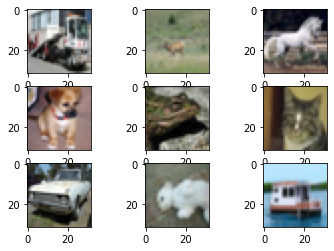

In [7]:
# Create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[randint(0, x_train.shape[0])])

---
Munge data
----

In [8]:
# Normalize inputs from 0-255 to 0.0-1.0
# Data should be normalized in deep learning for improving learning.
# Model weights are initialized between 0 and 1.
# stochastic gradient descent works best when all dimensions are on the same scale.

x_train = x_train.astype('float32')
x_train = x_train / 255.0

x_test = x_test.astype('float32')
x_test = x_test / 255.0

----
Define architecture
-----

In [9]:
from keras.models import Sequential
from keras.layers import * # It is okay to import everything since we are exploring

__Exercise__: Build a Convolutional Neural Network in Keras using a series of `Conv2D` and `Activation` layers.

The model instantiation, first layer, and last layer are given.

Feel free to explore `MaxPooling2D` and `Dropout`.

Feel to add has many layers as you want.

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

### START CODE HERE ###

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())

model.add(Dropout(.2))
model.add(Activation('relu'))


### END CODE HERE ###

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [11]:
# Have a look at your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [12]:
from tensorflow.keras.optimizers import SGD

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

----
Train model
-----

In [14]:
# Number of samples before a backprop pass of weight updating
batch_size = 32 

In [24]:
# Number of passes over the complete dataset
# This should be 1 to start with to make sure everything is setup correctly and the model is learning
# Increase it until model stops learning
epochs = 100

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
x_data = tf.stack(x_test)

In [18]:
x_data[1].shape

TensorShape([32, 32, 3])

In [19]:
#y_test = tf.stack(y_test)
y_test.shape

(10000, 10)

In [29]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True)

Epoch 1/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3146 - accuracy: 0.8837
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3119 - accuracy: 0.8854
Epoch 3/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3123 - accuracy: 0.8830
Epoch 4/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3099 - accuracy: 0.8862
Epoch 5/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3140 - accuracy: 0.8847
Epoch 6/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3091 - accuracy: 0.8865
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3097 - accuracy: 0.8855
Epoch 8/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3125 - accuracy: 0.8846
Epoch 9/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3054 - accuracy: 0.8867
Epoch 10/100
1563/1563 [==============================] - 12s 8m

Test performance
-----

In [27]:
score = model.evaluate(x_test, 
                       y_test, 
                       verbose=True)

313/313 [==============================] - 1s 5ms/step - loss: 1.3020 - accuracy: 0.6804


In [28]:
print(f'Test accuracy: {score[1]:.4f}')

Test accuracy: 0.6804


__Exercise:__

How could you change your model and training to improve performance?

It is a good idea to keep track of your experimental choices in a table


| Training Accuracy | Test Accuracy | Changes |  
|:-------:|:------:|:------:|
|0.9029|0.6819|conv2D->MaxPooling->Flatten->Drop|
|  |  | | 

Submit your table and your single best model.

<br>
<br> 
<br>

----